In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

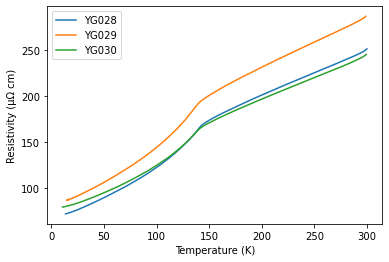

In [6]:
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_RT.dat', sep='\s+')
w, l, d, e = 20*1e-6, 95*1e-6, 42*1e-9, 1.60217663e-19
T_28 = df_28['T_sample_(K)']
rho_28 = df_28['R_nv']* w * d / l

df_29 = pd.read_csv('./transport/29/220705Low-T_DCR/Yichen29_RT.dat', sep='\s+')
w, l, d, e = 20*1e-6, 95*1e-6, 40*1e-9, 1.60217663e-19
T_29 = df_29['T_sample_(K)'][:2500]
rho_29 = df_29['R_nv'][:2500]* w * d / l

df_30 = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_RT.dat', sep='\s+')
w, l, d, e = 20*1e-6, 95*1e-6, 36.2*1e-9, 1.60217663e-19
T_30 = df_30['T_sample_(K)']
rho_30 = df_30['R_nv']* w * d / l

plt.plot(T_28, rho_28 * 1e8, label = 'YG028')
plt.plot(T_29, rho_29 * 1e8, label = 'YG029')
plt.plot(T_30, rho_30 * 1e8, label = 'YG030')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
plt.show()

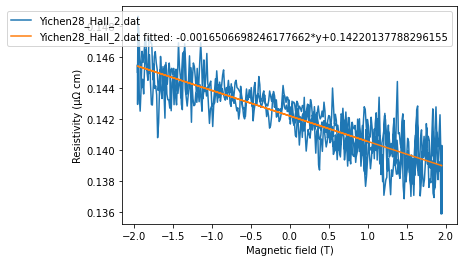

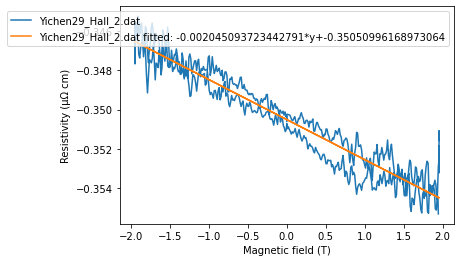

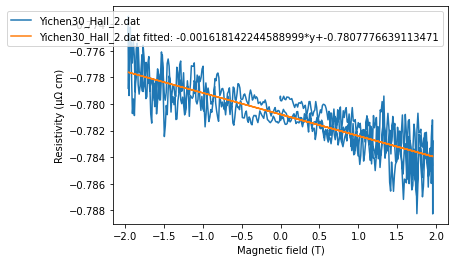

carrier density: n = [1.0445297757709853e+23, 8.430781249855802e+22, 1.0655267097472383e+23] / cm^3


In [7]:
n = []
files = [
    './transport/28/220704Low-T_DCR/Yichen28_Hall_2.dat',
    './transport/29/220705Low-T_DCR/Yichen29_Hall_2.dat',
    './transport/30/220706Low-T_DCR/Yichen30_Hall_2.dat'
]
for file in files:
    df = pd.read_csv(file, sep='\s+')

    B = df['B_analog_(T)']
    R = df['R_nv']

    a, b = np.polyfit(B, R, 1)
    R_fit = a*B+b

    label = file.split('/')[-1]
    plt.plot(B, R, label = label)
    plt.plot(B, R_fit, label = f'{label} fitted: {a}*y+{b}')
    plt.legend()
    plt.xlabel('Magnetic field (T)')
    plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
    plt.show()
    
    n.append(1/(a*(-e)*d)/1e6)
print(f'carrier density: n =',n,'/ cm^3')

$$\rho = \frac{1}{\mu \cdot n \cdot e}$$

carrier density: n = [1.0445297757709853e+23, 8.430781249855802e+22, 1.0655267097472383e+23] / cm^3


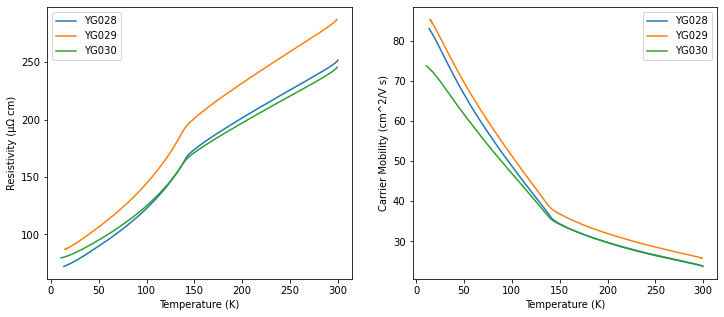

In [8]:
print(f'carrier density: n =',n,'/ cm^3')
miu_28 = 1 / (rho_28 * e * n[0])
miu_29 = 1 / (rho_29 * e * n[1])
miu_30 = 1 / (rho_30 * e * n[2])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(T_28, rho_28 * 1e8, label = 'YG028')
axes[0].plot(T_29, rho_29 * 1e8, label = 'YG029')
axes[0].plot(T_30, rho_30 * 1e8, label = 'YG030')
axes[0].legend()
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Resistivity (\u03BC\u03A9 cm)')

axes[1].plot(T_28, miu_28, label = 'YG028')
axes[1].plot(T_29, miu_29, label = 'YG029')
axes[1].plot(T_30, miu_30, label = 'YG030')
axes[1].legend()
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Carrier Mobility (cm^2/V s)')
plt.show()

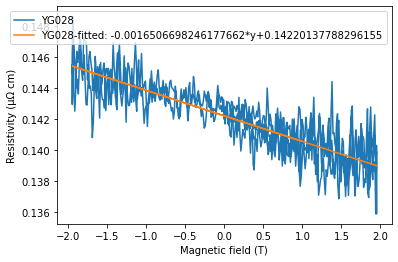

carrier density: n = 1.0803422252259907e+23 / cm^3


In [3]:
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_Hall_2.dat', sep='\s+')

B_28 = df_28['B_analog_(T)']
R_28 = df_28['R_nv']

a, b = np.polyfit(B_28, R_28, 1)
R_28_fit = a*B_28+b

plt.plot(B_28, R_28, label = 'YG028')
plt.plot(B_28, R_28_fit, label = f'YG028-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
plt.show()

n = 1/(a*(-e)*d)/1e6
print('carrier density: n =',n,'/ cm^3')

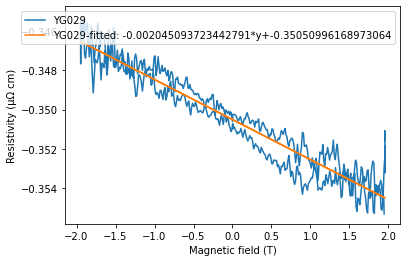

carrier density: n = 8.71983660699372e+22 / cm^3


In [4]:
df_29 = pd.read_csv('./transport/29/220705Low-T_DCR/Yichen29_Hall_2.dat', sep='\s+')

B_29 = df_29['B_analog_(T)']
R_29 = df_29['R_nv']

a, b = np.polyfit(B_29, R_29, 1)
R_29_fit = a*B_29+b

plt.plot(B_29, R_29, label = 'YG029')
plt.plot(B_29, R_29_fit, label = f'YG029-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
plt.show()

n = 1/(a*(-e)*d)/1e6
print('carrier density: n =',n,'/ cm^3')

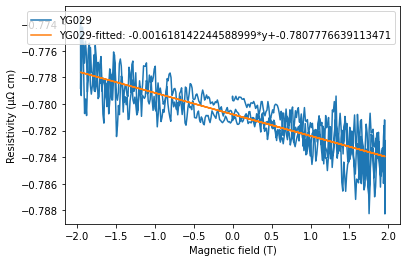

carrier density: n = 1.1020590540814293e+23 / cm^3


In [5]:
df_29 = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_Hall_2.dat', sep='\s+')

B_29 = df_29['B_analog_(T)']
R_29 = df_29['R_nv']

a, b = np.polyfit(B_29, R_29, 1)
R_29_fit = a*B_29+b

plt.plot(B_29, R_29, label = 'YG029')
plt.plot(B_29, R_29_fit, label = f'YG029-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
plt.show()

n = 1/(a*(-e)*d)/1e6
print('carrier density: n =',n,'/ cm^3')

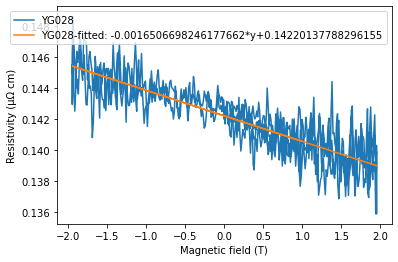

carrier density: n = 1.0803422252259907e+23 / cm^3


In [2]:
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_Hall_2.dat', sep='\s+')

w, l, d, e = 20*1e-6, 95*1e-6, 35*1e-9, 1.60217663e-19
B_28 = df_28['B_analog_(T)']
R_28 = df_28['R_nv']
# rho_28 = df_28['R_nv']* w * d / l * 1e8

a, b = np.polyfit(B_28, R_28, 1)
R_28_fit = a*B_28+b
# rho_28_fit = a*B_28+b

plt.plot(B_28, R_28, label = 'YG028')
plt.plot(B_28, R_28_fit, label = f'YG028-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
plt.show()

n = 1/(a*(-e)*d)/1e6
print('carrier density: n =',n,'/ cm^3')

In [ ]:
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_Hall_2.dat', sep='\s+')

w, l, d, e = 20*1e-6, 95*1e-6, 35*1e-9, 1.60217663e-19
B_28 = df_28['B_analog_(T)']
R_28 = df_28['R_nv']
# rho_28 = df_28['R_nv']* w * d / l * 1e8

a, b = np.polyfit(B_28, R_28, 1)
R_28_fit = a*B_28+b
# rho_28_fit = a*B_28+b

plt.plot(B_28, R_28, label = 'YG028')
plt.plot(B_28, R_28_fit, label = f'YG028-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03BC\u03A9 cm)')
plt.show()

n = 1/(a*(-e)*d)/1e6
print('carrier density: n =',n,'/ cm^3')

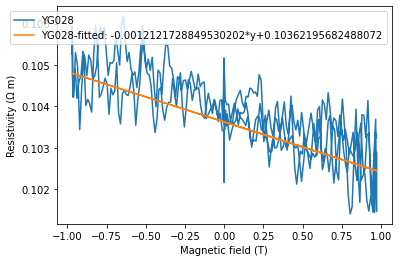

1.4711501416813721e+29

In [54]:
# print(open("./transport/28/220704Low-T_DCR/par_Yichen28_Hall.txt", "r").read())
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_Hall.dat', sep='\s+')
# print(df_28)

w, l, d = 20*1e-6, 95*1e-6, 35*1e-9
B_28 = df_28['B_analog_(T)']
rho_28 = df_28['R_nv']* w * d / l * 1e8

a, b = np.polyfit(B_28, rho_28, 1)
rho_28_fit = a*B_28+b
# a, b = np.round(a, 2), np.round(b, 2)

plt.plot(B_28, rho_28, label = 'YG028')
plt.plot(B_28, rho_28_fit, label = f'YG028-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03A9 m)')
plt.show()

e = 1.60217663e-19
n = 1/(a*(-e)*d)
n

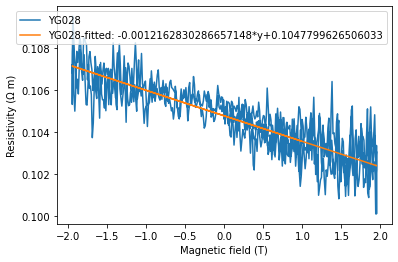

carrier density: n = 1.4661787342352823e+23 / cm^3


In [66]:
# print(open("./transport/28/220704Low-T_DCR/par_Yichen28_Hall.txt", "r").read())
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_Hall_2.dat', sep='\s+')
# print(df_28)

w, l, d = 20*1e-6, 95*1e-6, 35*1e-9
B_28 = df_28['B_analog_(T)']
rho_28 = df_28['R_nv']* w * d / l * 1e8

a, b = np.polyfit(B_28, rho_28, 1)
rho_28_fit = a*B_28+b
# a, b = np.round(a, 2), np.round(b, 2)

plt.plot(B_28, rho_28, label = 'YG028')
plt.plot(B_28, rho_28_fit, label = f'YG028-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03A9 m)')
plt.show()

e = 1.60217663e-19
n = 1/(a*(-e)*d)/1e6
print('carrier density: n =',n,'/ cm^3')

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_RT(files, T_label, R_label, sample_width, sample_length, sample_thickness, scales):
    for i, file in enumerate(files):
        label = file.split('/')[-1]
        df = pd.read_csv(file, sep='\s+')
        T = df[T_label]
        R = df[R_label]*scales[i]*sample_width[i]*sample_thickness[i]/sample_length[i]
        plt.plot(T, R, label=label)
    plt.legend()
    plt.xlabel('Temperature (K)')
    plt.ylabel('Resistivity (\u03A9 m)')
    plt.show()

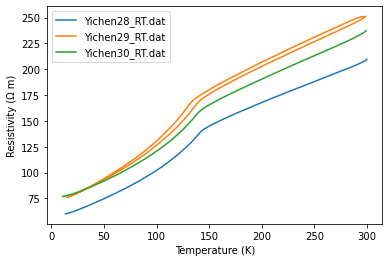

In [19]:
files = ['./transport/28/220704Low-T_DCR/Yichen28_RT.dat',
         './transport/29/220705Low-T_DCR/Yichen29_RT.dat',
         './transport/30/220706Low-T_DCR/Yichen30_RT.dat' ]
T_label, R_label = 'T_sample_(K)', 'R_nv'
sample_width = [20*1e-6, 20*1e-6, 20*1e-6]
sample_length = [95*1e-6, 95*1e-6, 95*1e-6]
sample_thickness = [35*1e-9, 35*1e-9, 35*1e-9]
scales = [1e6*1e2, 1e6*1e2, 1e6*1e2] # 1e-5A, 
plot_RT(files, T_label, R_label, sample_width, sample_length, sample_thickness, scales)

In [ ]:
print('28:', open("./transport/28/220704Low-T_DCR/par_Yichen28_RT.txt", "r").read())
print('29:', open("./transport/29/220705Low-T_DCR/par_Yichen29_RT.txt", "r").read())
print('30:', open("./transport/30/220706Low-T_DCR/par_Yichen30_RT.txt", "r").read())

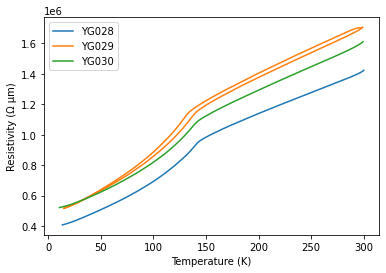

In [42]:
# print(open("./transport/28/220704Low-T_DCR/par_Yichen28_RT.txt", "r").read())
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_RT.dat', sep='\s+')
T_28 = df_28['T_sample_(K)']
R_28 = df_28['R_nv']*1e5/(20)

# print(open("./transport/29/220705Low-T_DCR/par_Yichen29_RT.txt", "r").read())
df_29 = pd.read_csv('./transport/29/220705Low-T_DCR/Yichen29_RT.dat', sep='\s+')
T_29 = df_29['T_sample_(K)']
R_29 = df_29['R_nv']*1e5/(20)

# print(open("./transport/30/220706Low-T_DCR/par_Yichen30_RT_hall_100k.txt", "r").read())
# df_30 = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_RT.dat', sep='\s+')
# T_30 = df_30['T_sample_(K)']
# R_30 = df_30['R_nv']*1e6/(20*1e-6)*1e6

# print(open("./transport/30/220706Low-T_DCR/par_Yichen30_RT.txt", "r").read())
df_30 = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_RT.dat', sep='\s+')
T_30 = df_30['T_sample_(K)']
R_30 = df_30['R_nv']*1e5/(20)

plt.plot(T_28, R_28, label = 'YG028')
plt.plot(T_29, R_29, label = 'YG029')
plt.plot(T_30, R_30, label = 'YG030')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity (\u03A9 \u03BCm)')
plt.show()

     B_digital_(T)  B_analog_(T)  T_VTI_(K)  T_sample_(K)     I_s      V_nv  \
0         0.000470     -0.001152    299.610       299.233  0.0001  0.000014   
1         0.001045     -0.001151    299.612       299.235  0.0001  0.000014   
2         0.001170     -0.001149    299.616       299.238  0.0001  0.000014   
3         0.000950     -0.001149    299.619       299.241  0.0001  0.000014   
4         0.000950     -0.001148    299.622       299.246  0.0001  0.000014   
..             ...           ...        ...           ...     ...       ...   
838       0.990075      0.935441    299.413       299.238  0.0001  0.000014   
839       0.998445      0.947676    299.420       299.239  0.0001  0.000014   
840       1.000710      0.957316    299.428       299.241  0.0001  0.000014   
841       1.000230      0.963820    299.433       299.242  0.0001  0.000014   
842       1.000320      0.967843    299.439       299.243  0.0001  0.000014   

         R_nv  
0    0.140338  
1    0.140027  
2  

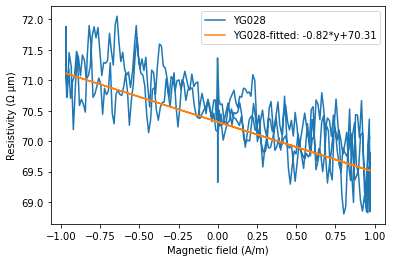

In [20]:
# print(open("./transport/28/220704Low-T_DCR/par_Yichen28_Hall.txt", "r").read())
df_28 = pd.read_csv('./transport/28/220704Low-T_DCR/Yichen28_Hall.dat', sep='\s+')
print(df_28)

B_28 = df_28['B_analog_(T)']
T_28 = df_28['T_sample_(K)']
I_28 = df_28['I_s'] * 1e-4
V_28 = df_28['V_nv']
R_28 = df_28['R_nv'] * 1e4 / 20

a, b = np.polyfit(B_28, R_28, 1)
R_28_fit = a*B_28+b
a, b = np.round(a, 2), np.round(b, 2)

plt.plot(B_28, R_28, label = 'YG028')
plt.plot(B_28, R_28_fit, label = f'YG028-fitted: {a}*y+{b}')
plt.legend()
plt.xlabel('Magnetic field (T)')
plt.ylabel('Resistivity (\u03BCm)')
plt.show()

e = 1.60217663e-19
n = -1/(a*e*d)

In [55]:
a, b

(-0.8225458862180862, 70.31489927402619)

In [39]:
T_28 = df_28['T_sample_(K)']
R_28 = df_28['R_nv']*1e6/(20)

Source mode	Source I Measure I
Method	Simple
Source I, Amp	1.000000E-4
Source V, Volt	1.000000E+0
Compliance V, Volt	10.000
Compliance I, Amp	1.000000E-5
No. of readings to average	1
Delay between readings, sec	1.000000
Settle time, sec	1.000000
Scanning	None
Channel	1
Range Ch1, Volt	1.000000
Range Ch2, Volt	1.000000
Autorange Ch1	TRUE
Autorange Ch2	TRUE
4-wire sense	FALSE



In [ ]:
# print(open("./transport/29/220705Low-T_DCR/par_Yichen29_RT.txt", "r").read())
df_29 = pd.read_csv('./transport/29/220705Low-T_DCR/Yichen29_RT.dat', sep='\s+')
T_29 = df_29['T_sample_(K)']
R_29 = df_29['R_nv']*1e6/(20)

# print(open("./transport/30/220706Low-T_DCR/par_Yichen30_RT_hall_100k.txt", "r").read())
# df_30 = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_RT.dat', sep='\s+')
# T_30 = df_30['T_sample_(K)']
# R_30 = df_30['R_nv']*1e6/(20*1e-6)*1e6

# print(open("./transport/30/220706Low-T_DCR/par_Yichen30_RT.txt", "r").read())
df_30 = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_RT.dat', sep='\s+')
T_30 = df_30['T_sample_(K)']
R_30 = df_30['R_nv']*1e6/(20)

plt.plot(T_28, R_28, label = 'YG028')
plt.plot(T_29, R_29, label = 'YG029')
plt.plot(T_30, R_30, label = 'YG030')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Resistivity (\u03A9 \u03BCm)')
plt.show()

In [86]:
df = pd.read_csv('./transport/28/Hall/220704Low-T_DCR/Yichen28_Hall.dat', sep='\s+')
print(df)

     B_digital_(T)  B_analog_(T)  T_VTI_(K)  T_sample_(K)     I_s      V_nv  \
0         0.000470     -0.001152    299.610       299.233  0.0001  0.000014   
1         0.001045     -0.001151    299.612       299.235  0.0001  0.000014   
2         0.001170     -0.001149    299.616       299.238  0.0001  0.000014   
3         0.000950     -0.001149    299.619       299.241  0.0001  0.000014   
4         0.000950     -0.001148    299.622       299.246  0.0001  0.000014   
..             ...           ...        ...           ...     ...       ...   
838       0.990075      0.935441    299.413       299.238  0.0001  0.000014   
839       0.998445      0.947676    299.420       299.239  0.0001  0.000014   
840       1.000710      0.957316    299.428       299.241  0.0001  0.000014   
841       1.000230      0.963820    299.433       299.242  0.0001  0.000014   
842       1.000320      0.967843    299.439       299.243  0.0001  0.000014   

         R_nv  
0    0.140338  
1    0.140027  
2  

     B_digital_(T)  B_analog_(T)  T_VTI_(K)  T_sample_(K)     I_s      V_nv  \
0         0.000470     -0.001152    299.610       299.233  0.0001  0.000014   
1         0.001045     -0.001151    299.612       299.235  0.0001  0.000014   
2         0.001170     -0.001149    299.616       299.238  0.0001  0.000014   
3         0.000950     -0.001149    299.619       299.241  0.0001  0.000014   
4         0.000950     -0.001148    299.622       299.246  0.0001  0.000014   
..             ...           ...        ...           ...     ...       ...   
838       0.990075      0.935441    299.413       299.238  0.0001  0.000014   
839       0.998445      0.947676    299.420       299.239  0.0001  0.000014   
840       1.000710      0.957316    299.428       299.241  0.0001  0.000014   
841       1.000230      0.963820    299.433       299.242  0.0001  0.000014   
842       1.000320      0.967843    299.439       299.243  0.0001  0.000014   

         R_nv  
0    0.140338  
1    0.140027  
2  

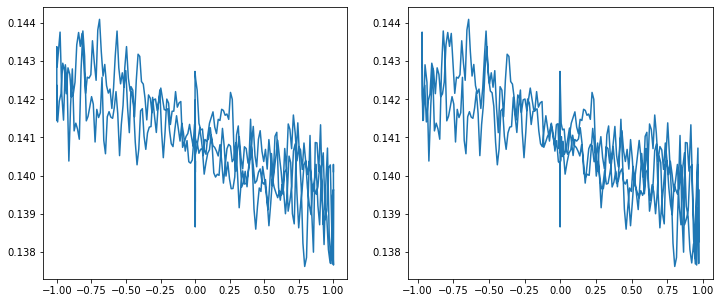

     B_digital_(T)  B_analog_(T)  T_VTI_(K)  T_sample_(K)     I_s      V_nv  \
0         1.001000      0.981518    299.296       299.034  0.0001  0.000014   
1         1.000480      0.981516    299.303       299.036  0.0001  0.000014   
2         0.992713      0.981267    299.315       299.040  0.0001  0.000014   
3         0.980409      0.980177    299.323       299.044  0.0001  0.000014   
4         0.967703      0.976590    299.331       299.048  0.0001  0.000014   
..             ...           ...        ...           ...     ...       ...   
898       1.984330      1.908890    299.557       299.385  0.0001  0.000014   
899       1.997060      1.921450    299.555       299.385  0.0001  0.000014   
900       2.001310      1.932260    299.551       299.386  0.0001  0.000014   
901       2.001520      1.940060    299.550       299.384  0.0001  0.000014   
902       2.001520      1.945160    299.548       299.382  0.0001  0.000014   

         R_nv  
0    0.139215  
1    0.139466  
2  

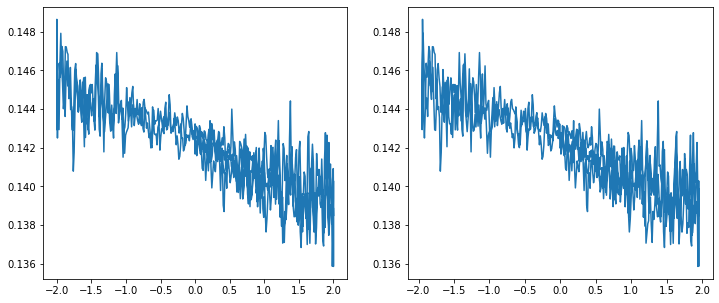

In [82]:
df = pd.read_csv('./transport/28/Hall/220704Low-T_DCR/Yichen28_Hall.dat', sep='\s+')
print(df)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(df['B_digital_(T)'], df['R_nv'])
axes[1].plot(df['B_analog_(T)'], df['R_nv'])
plt.show()

df = pd.read_csv('./transport/28/Hall/220704Low-T_DCR/Yichen28_Hall_2.dat', sep='\s+')
print(df)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(df['B_digital_(T)'], df['R_nv'])
axes[1].plot(df['B_analog_(T)'], df['R_nv'])
plt.show()

      B_digital_(T)  B_analog_(T)     I_s      V_nv      R_nv
0           2.00152       1.95677  0.0001 -0.000037 -0.369609
1           2.00185       1.95673  0.0001 -0.000037 -0.367597
2           2.00200       1.95674  0.0001 -0.000037 -0.367626
3           2.00200       1.95674  0.0001 -0.000037 -0.368413
4           2.00200       1.95674  0.0001 -0.000037 -0.365266
...             ...           ...     ...       ...       ...
1123        1.98887       1.91130  0.0001  0.000035  0.353704
1124        2.00000       1.92343  0.0001  0.000035  0.353201
1125        2.00181       1.93332  0.0001  0.000035  0.353147
1126        2.00152       1.94002  0.0001  0.000035  0.354241
1127        2.00152       1.94427  0.0001  0.000035  0.353401

[1128 rows x 5 columns]


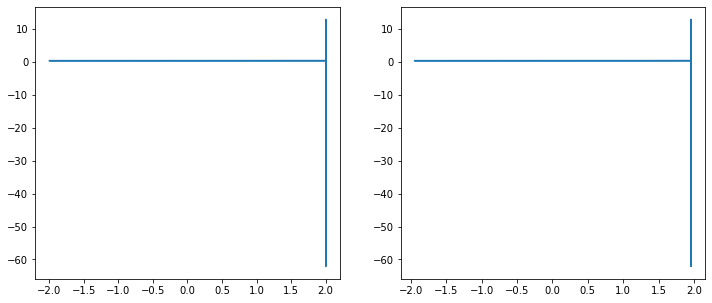

     B_digital_(T)  B_analog_(T)     I_s      V_nv      R_nv
0          2.00105       1.95367  0.0001 -0.000035 -0.351574
1          2.00200       1.95375  0.0001 -0.000035 -0.351410
2          2.00128       1.95393  0.0001 -0.000035 -0.351077
3          2.00136       1.95414  0.0001 -0.000035 -0.351585
4          2.00126       1.95429  0.0001 -0.000035 -0.352701
..             ...           ...     ...       ...       ...
656        1.99014       1.91300  0.0001 -0.000035 -0.353838
657        1.99931       1.92483  0.0001 -0.000035 -0.354580
658        2.00152       1.93444  0.0001 -0.000035 -0.354433
659        2.00152       1.94083  0.0001 -0.000035 -0.354591
660        2.00152       1.94483  0.0001 -0.000036 -0.355328

[661 rows x 5 columns]


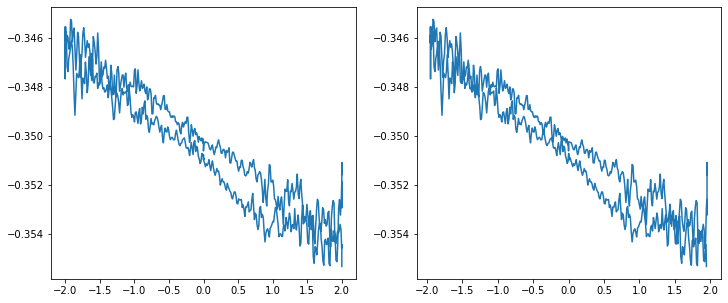

In [81]:
df = pd.read_csv('./transport/29/220705Low-T_DCR/Yichen29_Hall.dat', sep='\s+')
print(df)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(df['B_digital_(T)'], df['R_nv'])
axes[1].plot(df['B_analog_(T)'], df['R_nv'])
plt.show()

df = pd.read_csv('./transport/29/220705Low-T_DCR/Yichen29_Hall_2.dat', sep='\s+')
print(df)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(df['B_digital_(T)'], df['R_nv'])
axes[1].plot(df['B_analog_(T)'], df['R_nv'])
plt.show()

     B_digital_(T)  B_analog_(T)     I_s      V_nv      R_nv
0         0.000470     -0.002495  0.0001 -0.000078 -0.779568
1         0.001009     -0.002485  0.0001 -0.000078 -0.779410
2         0.009527     -0.002184  0.0001 -0.000078 -0.779415
3         0.022493     -0.001013  0.0001 -0.000078 -0.779710
4         0.035068      0.003301  0.0001 -0.000078 -0.779746
..             ...           ...     ...       ...       ...
813       1.985500      1.914610  0.0001 -0.000078 -0.784285
814       1.997640      1.926990  0.0001 -0.000078 -0.784905
815       2.001830      1.937570  0.0001 -0.000078 -0.782472
816       2.001720      1.944990  0.0001 -0.000078 -0.781621
817       2.001250      1.949900  0.0001 -0.000078 -0.784588

[818 rows x 5 columns]


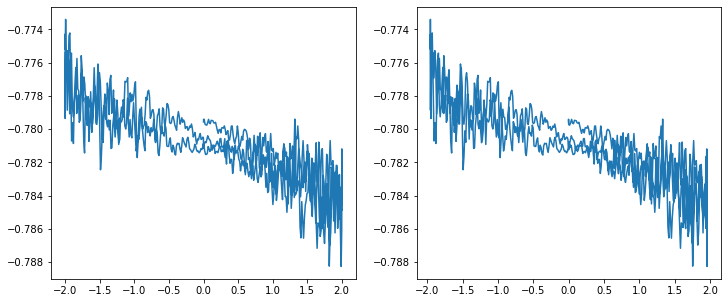

     B_digital_(T)  B_analog_(T)     I_s      V_nv      R_nv
0         0.000470     -0.005903  0.0001 -0.000046 -0.456467
1         0.000470     -0.005900  0.0001 -0.000046 -0.456517
2         0.015458     -0.005477  0.0001 -0.000046 -0.456738
3         0.031314     -0.002399  0.0001 -0.000046 -0.456582
4         0.050684      0.008344  0.0001 -0.000046 -0.456331
..             ...           ...     ...       ...       ...
173       0.763958      0.806033  0.0001 -0.000044 -0.438255
174       0.744959      0.786629  0.0001 -0.000044 -0.438890
175       0.725574      0.767173  0.0001 -0.000044 -0.437636
176       0.706388      0.747728  0.0001 -0.000044 -0.439286
177       0.686421      0.728257  0.0001 -0.000044 -0.440223

[178 rows x 5 columns]


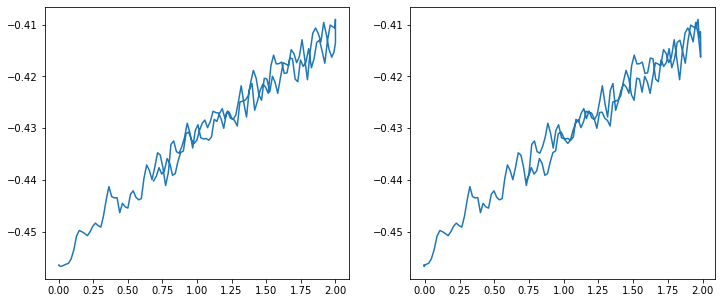

In [83]:
df = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_Hall_2.dat', sep='\s+')
print(df)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(df['B_digital_(T)'], df['R_nv'])
axes[1].plot(df['B_analog_(T)'], df['R_nv'])
plt.show()

df = pd.read_csv('./transport/30/220706Low-T_DCR/Yichen30_RT_hall_100k.dat', sep='\s+')
print(df)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].plot(df['B_digital_(T)'], df['R_nv'])
axes[1].plot(df['B_analog_(T)'], df['R_nv'])
plt.show()

NameError: name 'plt' is not defined

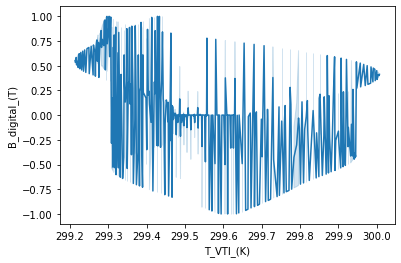

In [40]:
df = pd.read_csv('./transport/28/Hall/220704Low-T_DCR/Yichen28_Hall.dat', sep='\s+')
print(df)

sns.lineplot(x=df['T_VTI_(K)'], y=df['B_digital_(T)'])
plt.show()

sns.lineplot(x=df['T_VTI_(K)'], y=df['R_nv'])
plt.show()
sns.lineplot(x=df['T_sample_(K)'], y=df['R_nv'])
plt.show()

sns.lineplot(x=df['B_digital_(T)'], y=df['R_nv'])
plt.show()
sns.lineplot(x=df['B_analog_(T)'], y=df['R_nv'])
plt.show()

In [3]:
import csv
with open('./transport/28/Hall/220704Low-T_DCR/Yichen28_Hall.dat') as f:
    reader = csv.reader(f, delimiter="\t")
    for line in reader:
        print(line)

['B_digital_(T)', 'B_analog_(T)', 'T_VTI_(K)', 'T_sample_(K)', 'I_s', 'V_nv', 'R_nv']
['4.70000E-4', '-1.15161E-3', '2.99610E+2', '2.99233E+2', '9.99985E-5', '1.40336E-5', '1.40338E-1']
['1.04499E-3', '-1.15071E-3', '2.99612E+2', '2.99235E+2', '9.99985E-5', '1.40025E-5', '1.40027E-1']
['1.16970E-3', '-1.14928E-3', '2.99616E+2', '2.99238E+2', '9.99984E-5', '1.39946E-5', '1.39948E-1']
['9.50000E-4', '-1.14859E-3', '2.99619E+2', '2.99241E+2', '9.99985E-5', '1.40047E-5', '1.40049E-1']
['9.50000E-4', '-1.14790E-3', '2.99622E+2', '2.99246E+2', '9.99985E-5', '1.39900E-5', '1.39902E-1']
['6.86699E-4', '-1.14698E-3', '2.99623E+2', '2.99248E+2', '9.99985E-5', '1.39287E-5', '1.39289E-1']
['4.70000E-4', '-1.14628E-3', '2.99626E+2', '2.99250E+2', '9.99985E-5', '1.38649E-5', '1.38651E-1']
['1.10553E-3', '-1.14536E-3', '2.99628E+2', '2.99253E+2', '9.99985E-5', '1.39136E-5', '1.39138E-1']
['8.06305E-4', '-1.14443E-3', '2.99630E+2', '2.99257E+2', '9.99984E-5', '1.39529E-5', '1.39531E-1']
['4.70000E-4',